In [1]:
import numpy as np
import pandas as pd
import warnings
from scipy.stats import chi2_contingency
from scipy import stats
from matplotlib import pyplot as plt
import json
import yapf.yapflib.yapf_api
from sklearn.utils import shuffle
warnings.filterwarnings("ignore")

1 Read the dataset 
========

In [2]:
maindata= pd.read_csv('../Dataset/DATASET_2019-10-24_light.txt',sep=',')

In [3]:
class0=maindata[maindata.CLASS==0]
class1=maindata[maindata.CLASS==1]
class0=class0.sample(class1.shape[0],random_state=42)
data=pd.concat([class1,class0])
print(data.shape)

data.groupby(by='CLASS').size()

(9482, 407)


CLASS
0    4741
1    4741
dtype: int64

In [4]:

data['FIELD_6_7']=np.min(data[['FIELD_6','FIELD_7']],axis=1) #combine FIELD_6 and FIELD_7 both represent the same thing (Women's marital status)
data=data.drop(columns=['FIELD_6','FIELD_7','COMPARE','B_DAY','Unnamed: 0'])#,'FIELD_1','FIELD_2'
print(data.shape)

(9482, 403)


In [5]:
# rename columns
data.rename(
    columns={
        "L104600": "HBA1C",
        "L103000": "Triglycerides",
        "L100800": "fasting glucose",
        "S000300": "BMI",
        "S000501": "SBP",
        "S000502": "DBP",
        "L101700": "r-GTP gamma",
        "L103300": "Cardiac risk factor",
        "L190400": "Hemoglobin",
        "L190500": "HCT",
        "L100700": "Uric Acid",
        "L101300": "SGPT",
        "L190300": "RBC",
        "L102900": "total cholesterol",
        "L103100": "HDL-Cholesterol",
    },
    inplace=True,
)
mydata = data.rename(
    columns={
        "FIELD_33": "_4_1_Smoking",
        "FIELD_38": "Drinking_5_1_days",
        "FIELD_40": "_6_1_of_physical_activity_high_strength",
        "FIELD_31": "Family_history",
        "FIELD_41": "_6_2_of_physical_activity_moderate",
        "FIELD_27": "_2_family_history_stroke",
        "FIELD_21": "_1_medication_heart_disease",
        "FIELD_14": "Whether_one_diagnosis_disease",
        "FIELD_32": "_3B_hepatitis",
        "FIELD_42": "_6_3_of_physical_activity_walking",
        "FIELD_4": "blood_type",
        "FIELD_29": "_2_family_history_hypertension",
        "FIELD_3": "Blood_factor_RH_factor",
        "FIELD_19": "_1_drug_therapy_stroke",
    },
    inplace=True,
)

3.4 Final Selected Features
======

In [6]:

finalFeatures = ['AGE', 'BMI', 'FIELD_15', 'L190900',
                 'Cardiac risk factor', 'L504700', 'RBC',
                 'HDL-Cholesterol', 'Uric Acid', 
                 '_4_1_Smoking', 'Drinking_5_1_days', 'SEX','Triglycerides','r-GTP gamma',
#                  'SBP',  'DBP','fasting glucose', 
                 #'L101400', 'L100400', 'L190000', 'L105200', 
                 'CLASS'
]




Classifier Model Test Based on the features 
========

In [7]:
randomseed = 7
mydata = data[finalFeatures].copy().dropna()
print(mydata.shape)
mydata.head()

(6279, 15)


,AGE,BMI,FIELD_15,L190900,Cardiac risk factor,L504700,RBC,HDL-Cholesterol,Uric Acid,_4_1_Smoking,Drinking_5_1_days,SEX,Triglycerides,r-GTP gamma,CLASS
501,46.0,25.4,0.0,13.2,4.0,3.26,4.93,54.0,5.8,2.0,4.0,0.0,88.0,43.0,1
633,47.0,29.2,0.0,13.9,5.4,1.48,5.25,28.0,4.1,3.0,1.0,0.0,277.0,43.0,1
735,48.0,21.5,0.0,13.4,3.0,0.62,4.58,72.0,4.4,1.0,3.0,1.0,94.0,33.0,1
1050,47.0,24.7,0.0,13.5,3.6,0.98,4.69,55.0,4.4,1.0,2.0,0.0,124.0,44.0,1
1759,49.0,28.4,0.0,13.1,5.3,3.70,4.71,37.0,5.5,1.0,1.0,0.0,177.0,44.0,1


In [8]:
class1 = mydata[mydata.CLASS == 1]
class0 = mydata[mydata.CLASS == 0]

print(class1.shape[0],class0.shape[0],)

class1_test = class1.sample(200, random_state=42)
class0_test = class0.sample(200, random_state=42)
test = pd.concat([class1_test, class0_test])
test=shuffle(test)


class1_train = class1.drop(class1_test.index) #.sample( class2_train.shape[0], random_state=randomseed)
class0_train = class0.drop(class0_test.index) #.sample( class2_train.shape[0], random_state=randomseed)
train = pd.concat([class1_train, class0_train])
train=shuffle(train, random_state=42)

3117 3162


In [9]:
# # generate synthetic dataset to overcome class imbalance
# from collections import Counter
# from numpy.random import RandomState
# from sklearn.datasets import make_classification
# from imblearn.over_sampling import SMOTENC

# sm = SMOTENC(random_state=42, categorical_features=[0],k_neighbors=10,sampling_strategy = 0.9)
# X_res, y_res = sm.fit_resample(train.iloc[:,:-1],train.iloc[:,-1])
# print("Resampled dataset samples per class {}".format(Counter(y_res)))

# train=pd.DataFrame(X_res,columns=list(train.columns[:-1]))
# train['CLASS']=y_res

In [10]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=1000, max_depth=10, criterion='gini')
rf.fit(train.iloc[:, :-1], train.iloc[:, -1])

RandomForestClassifier(max_depth=10, n_estimators=1000, random_state=42)

0.74


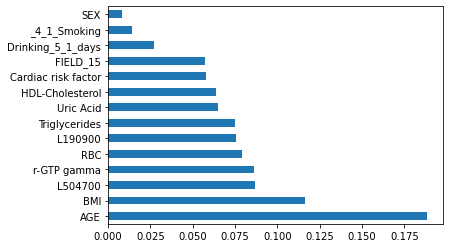

Index(['AGE', 'BMI', 'L504700', 'r-GTP gamma', 'RBC', 'L190900',
       'Triglycerides', 'Uric Acid', 'HDL-Cholesterol', 'Cardiac risk factor',
       'FIELD_15', 'Drinking_5_1_days', '_4_1_Smoking', 'SEX'],
      dtype='object')
1.0


In [11]:
ypred = rf.predict(test.iloc[:, :-1])

score = rf.score(test.iloc[:, :-1], test.iloc[:, -1])
print(score)

feat_importances = pd.Series(rf.feature_importances_, index=test.iloc[:, :-1].columns)
feat_importances.nlargest(16).plot(kind="barh")
plt.show()

print(feat_importances.nlargest(16).index)

print(np.sum(feat_importances.nlargest(16)))

In [12]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test.iloc[:, -1], ypred)

array([[151,  49],
       [ 55, 145]], dtype=int64)

In [13]:
print(
    "Accuracy on training set: {:.3f}".format(
        rf.score(train.iloc[:, :-1], train.iloc[:, -1])
    )
)
print(
    "Accuracy on test set: {:.3f}".format(rf.score(test.iloc[:, :-1], test.iloc[:, -1]))
)
ypred = rf.predict(test.iloc[:, :-1])

confmatrx = pd.DataFrame(confusion_matrix(test.iloc[:, -1], ypred))
confmatrx.head()

Accuracy on training set: 0.838
Accuracy on test set: 0.740


,0,1
0,151,49
1,55,145


In [14]:
from sklearn.metrics import classification_report

print(classification_report(test.iloc[:, -1], ypred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       200
           1       0.75      0.72      0.74       200

    accuracy                           0.74       400
   macro avg       0.74      0.74      0.74       400
weighted avg       0.74      0.74      0.74       400



In [15]:
# train.to_csv('train.csv',sep=',')
# test.to_csv('test.csv',sep=',')
# mydata.to_csv('mydata_train_test.csv',sep=',',index=False)

In [16]:
# mydata2 = data[['FIELD_1','FIELD_2','AGE', 'BMI', 'L101400', 'FIELD_15', 'L100400', 'L190900',
#                  'L190000', 'L105200', 'Cardiac risk factor', 'L504700', 'RBC',
#                  'HDL-Cholesterol', 'Uric Acid', 'fasting glucose', 'Triglycerides',
#                  'SBP',  'DBP',
#                  'CLASS'
# ]].copy().dropna()
# mydata2.to_csv('mydata_train_test.csv',sep=',',index=False)

In [23]:
import xgboost as xgb
from sklearn import metrics as m

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=randomseed)

xgb_model.fit(train.iloc[:, :-1], train.iloc[:, -1])

y_pred = xgb_model.predict((test.iloc[:, :-1]))

print(
    "Accuracy on training set: {:.3f}".format(
        xgb_model.score(train.iloc[:, :-1], train.iloc[:, -1])
    )
)
print(
    "Accuracy on test set: {:.3f}".format(xgb_model.score(test.iloc[:, :-1], test.iloc[:, -1]))
)
confmatrx = pd.DataFrame(confusion_matrix(test.iloc[:, -1], y_pred))
confmatrx.head()

Accuracy on training set: 0.963
Accuracy on test set: 0.688


,0,1
0,139,61
1,64,136


In [24]:
print(classification_report(test.iloc[:, -1], y_pred))

              precision    recall  f1-score   support

           0       0.68      0.69      0.69       200
           1       0.69      0.68      0.69       200

    accuracy                           0.69       400
   macro avg       0.69      0.69      0.69       400
weighted avg       0.69      0.69      0.69       400



In [25]:
# train.to_csv('datasets/classification/train.txt',sep=',')
# test.to_csv('datasets/classification/test.txt',sep=',')

In [26]:
import pickle

with open('ISchemicClassifierModel_rf', 'wb') as f:
    pickle.dump(rf, f)